In [1]:
import torch #type:ignore
import sklearn #type:ignore
import torch.nn #type:ignore
from sklearn.svm import SVR #type:ignore
from sklearn.ensemble import RandomForestRegressor #type:ignore
from sklearn.linear_model import LinearRegression #type:ignore
import matplotlib.pyplot as plt #type:ignore
%matplotlib inline

In [2]:
import pandas as pd #type:ignore

In [3]:
df = pd.read_csv('solar_weather.csv')
df.drop(['snow_1h' , 'clouds_all' , 'isSun' , 'weather_type'] , axis=1, inplace=True)

In [4]:
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,sunlightTime,dayLength,SunlightTime/daylength,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0,450,0.0,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0,450,0.0,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0,450,0.0,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0,450,0.0,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0,450,0.0,1,1


In [5]:
df['Time'] = pd.to_datetime(df['Time'])
# Decompose into separate columns
df['month'] = df['Time'].dt.month
df['day'] = df['Time'].dt.day
df['hour'] = df['Time'].dt.hour
df['minute'] = df['Time'].dt.minute
df.drop('Time' , axis=1 , inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Energy delta[Wh]        196776 non-null  int64  
 1   GHI                     196776 non-null  float64
 2   temp                    196776 non-null  float64
 3   pressure                196776 non-null  int64  
 4   humidity                196776 non-null  int64  
 5   wind_speed              196776 non-null  float64
 6   rain_1h                 196776 non-null  float64
 7   sunlightTime            196776 non-null  int64  
 8   dayLength               196776 non-null  int64  
 9   SunlightTime/daylength  196776 non-null  float64
 10  hour                    196776 non-null  int32  
 11  month                   196776 non-null  int32  
 12  day                     196776 non-null  int32  
 13  minute                  196776 non-null  int32  
dtypes: float64(5), int32

In [7]:
from sklearn.preprocessing import StandardScaler #type:ignore
scaler = StandardScaler()
columns_to_standardize = ['Energy delta[Wh]','GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'dayLength', 'SunlightTime/daylength']
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

In [8]:
print(df['GHI'].min() ,df['GHI'].max())
print(df['temp'].min() ,df['temp'].max())
print(df['pressure'].min() ,df['pressure'].max())
print(df['humidity'].min() ,df['humidity'].max())
print(df['wind_speed'].min() ,df['wind_speed'].max())
print(df['rain_1h'].min() ,df['rain_1h'].max())
print(df['dayLength'].min() ,df['dayLength'].max())
print(df['SunlightTime/daylength'].min() ,df['SunlightTime/daylength'].max())

-0.624791252082466 3.7683794689943118
-3.300709834096205 3.253052177054378
-3.9947615756004224 3.3077459247677807
-3.704756036012395 1.2938279453881207
-2.1615899670018566 5.688264445647019
-0.2367584079266022 28.768752820906485
-1.5325334162603708 1.3924978338508993
-0.8059840013346475 2.2333213403230716


In [9]:
xs = df.iloc[ :, 1:]
ys = df.iloc[: ,0]
xs[:5],ys[:5]

(        GHI      temp  pressure  humidity  wind_speed   rain_1h  sunlightTime  \
 0 -0.624791 -1.024403  0.595386  1.293828    0.528220 -0.236758             0   
 1 -0.624791 -1.024403  0.595386  1.293828    0.528220 -0.236758             0   
 2 -0.624791 -1.024403  0.595386  1.293828    0.528220 -0.236758             0   
 3 -0.624791 -1.024403  0.595386  1.293828    0.528220 -0.236758             0   
 4 -0.624791 -1.011896  0.491064  1.293828    0.692903 -0.236758             0   
 
    dayLength  SunlightTime/daylength  hour  month  day  minute  
 0  -1.532533               -0.805984     0      1    1       0  
 1  -1.532533               -0.805984     0      1    1      15  
 2  -1.532533               -0.805984     0      1    1      30  
 3  -1.532533               -0.805984     0      1    1      45  
 4  -1.532533               -0.805984     1      1    1       0  ,
 0   -0.548427
 1   -0.548427
 2   -0.548427
 3   -0.548427
 4   -0.548427
 Name: Energy delta[Wh], dtype: fl

In [10]:
LM = LinearRegression().fit(xs , ys)

In [11]:
LM.score(xs, ys)

0.8541449347648284

In [12]:
xs.shape

(196776, 13)

In [13]:
xs = df[['GHI','temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h','sunlightTime','dayLength','hour','day','minute','month', 'SunlightTime/daylength']].values
ys = df['Energy delta[Wh]'].values

In [14]:
xs_tensor = torch.tensor(xs, dtype=torch.float32)
ys_tensor = torch.tensor(ys, dtype=torch.float32)

In [15]:
weights = torch.randn(xs_tensor.shape[1], 1, requires_grad=True) * 0.01
bias = torch.zeros(1, requires_grad=True)

In [18]:
rf_model = RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf_model.fit(xs_tensor, ys_tensor)

RandomForestRegressor(random_state=42)

0.991018506479968


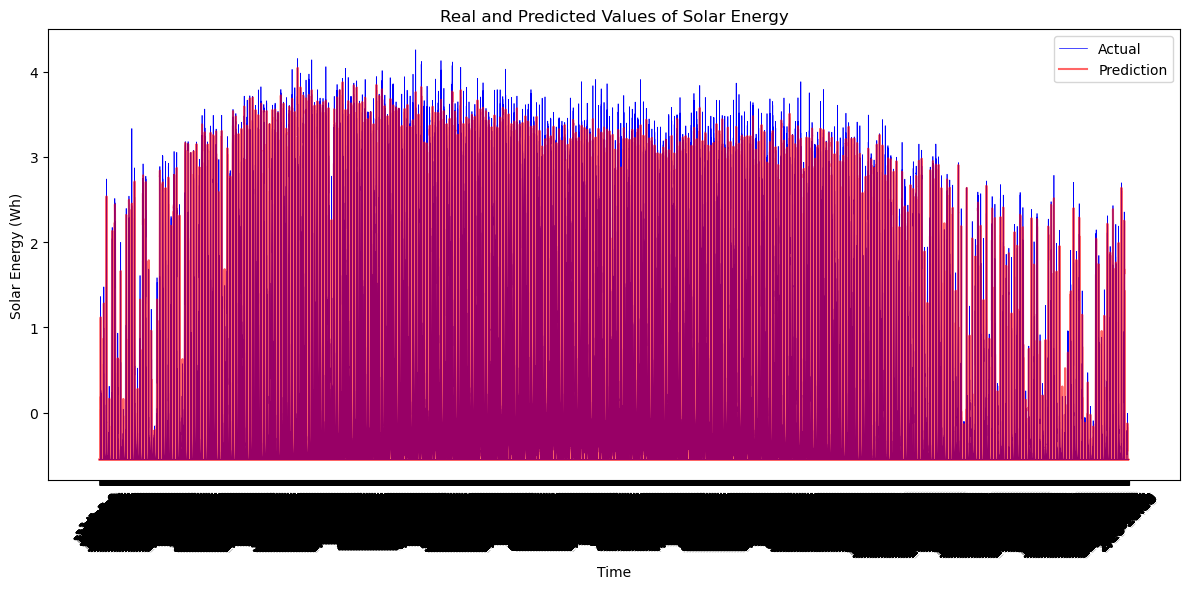

In [19]:
print(rf_model.score(xs_tensor , ys_tensor))
y_predict = rf_model.predict(xs_tensor)

time_index = df['month'].astype(str) + '/' + df['day'].astype(str) + ' ' + df['hour'].astype(str) + ':' + df['minute'].astype(str)

plt.figure(figsize=(12, 6))

plt.plot(time_index, ys_tensor, color='blue', label='Actual', linewidth=0.5)

plt.plot(time_index, y_predict, color='red', label='Prediction', alpha=0.6)

plt.xlabel('Time')
plt.ylabel('Solar Energy (Wh)')
plt.title('Real and Predicted Values of Solar Energy')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [21]:
print(len(time_index), len(ys_tensor), len(y_predict))

196776 196776 196776


In [22]:
from sklearn.model_selection import train_test_split #type:ignore
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(xs_tensor.numpy(), ys_tensor.numpy(), test_size=0.2, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

In [ ]:
import tensorflow as tf #type:ignore
from tensorflow.keras import layers, models, initializers, losses, optimizers #type:ignore

def create_model(input_dim):
    model = models.Sequential()
    model.add(layers.Dense(100, activation='tanh', kernel_initializer=initializers.HeUniform(), input_shape=(input_dim,)))
    model.add(layers.Dense(200, activation='tanh', kernel_initializer=initializers.HeUniform()))
    model.add(layers.Dense(300, activation='tanh', kernel_initializer=initializers.HeUniform()))
    model.add(layers.Dense(50, activation='tanh', kernel_initializer=initializers.HeUniform()))
    model.add(layers.Dense(25, activation='tanh', kernel_initializer=initializers.HeUniform()))
    model.add(layers.Dense(10, activation='tanh', kernel_initializer=initializers.HeUniform()))
    model.add(layers.Dense(5, activation='tanh', kernel_initializer=initializers.HeUniform()))
    model.add(layers.Dense(1))

    return model

input_dim = X_train_tensor.shape[1]
model = create_model(input_dim)

model.compile(optimizer=optimizers.legacy.Adam(), loss=losses.MeanSquaredError())

X_train_numpy = X_train_tensor.numpy()
y_train_numpy = y_train_tensor.numpy()
X_val_numpy = X_val_tensor.numpy()
y_val_numpy = y_val_tensor.numpy()

epochs = 50
batch_size = 1

device = 'mps' if tf.config.list_logical_devices('MPS') else 'cpu'
print(f"Using device: {device}")

with tf.device(f'/{device}'):
    for epoch in range(epochs):
        # Training loop
        total_loss = 0
        for i in range(len(X_train_numpy)):
            inputs = X_train_numpy[i:i+batch_size]
            labels = y_train_numpy[i:i+batch_size]

            with tf.GradientTape() as tape:
                predictions = model(inputs, training=True)
                loss = model.loss(labels, predictions)

            grads = tape.gradient(loss, model.trainable_variables)
            model.optimizer.apply_gradients(zip(grads, model.trainable_variables))

            total_loss += loss.numpy()

        avg_loss = total_loss / len(X_train_numpy)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

    # Optionally: evaluate on validation data
    val_loss = model.evaluate(X_val_numpy, y_val_numpy, verbose=0)
    print(f"Validation Loss: {val_loss:.4f}")